<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ChilwaHealthModel/ChilwaHealthModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:orange">Chiwa Basin Health Model</span>

**Created using: PyCaret 2.2** <br />
**Date Updated: January 03, 2022**

# 1.0  Objective
This model use Chilwa Basin Health dataset and connect it with other environmental parameters using the PyCaret automachine learning tool.

In this tutorial we will learn:


* **Getting Data:**  How to import data from your Google Drive repository
* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building models
* **Create Model:**  How to create a model, perform cross validation and evaluate regression metrics
* **Tune Model:**  How to automatically tune the hyperparameters of a regression model
* **Plot Model:**  How to analyze model performance using various plots
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make prediction on new / unseen data
* **Save / Load Model:**  How to save / load a model for future use

Read Time : Approx. ?? Minutes


## 1.1 Installing PyCaret
The first step to get started with PyCaret is to install PyCaret. Installation is easy and will only take a few minutes. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`

## 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Regression

## 1.3 For Google Colab Users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

## 1.4 See also:
- __[Regression Tutorial (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__
- __[Regression Tutorial (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__
- __[Regression Tutorial (REG103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Expert%20-%20REG103.ipynb)__

In [8]:
!pip install pycaret-ts-alpha -q

## 1.5 Enable  Colab for Colab users:

- PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.
- __[Installing the latest release](https://pycaret.org/install/)__

In [27]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 2.0 Getting the Data

You can download the data from the original source __[found here](https://github.com/mtofighi/ChilwaBasin/tree/fca7e058e9173b57eef291d3df32b6992ef7c95f/ChilwaHealthModel/Dataset)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require internet connection).

Here I read data from my GitHub account.

In [29]:
import pandas as pd
url = 'https://github.com/mtofighi/ChilwaBasin/raw/fca7e058e9173b57eef291d3df32b6992ef7c95f/ChilwaHealthModel/Dataset/Data2ML.xlsx'
dataset = pd.read_excel(url)

#check the shape of data
dataset.shape
dataset.head(250)
#dataset = dataset.drop( ['Date'], axis=1)
dataset.info()
dataset.head(250)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  260 non-null    datetime64[ns]
 1   Year                                  260 non-null    int64         
 2   Week                                  260 non-null    int64         
 3   District                              260 non-null    object        
 4   Population                            260 non-null    int64         
 5   Weekly Humidity Mean (%)              260 non-null    float64       
 6   Weekly Rainfall Sum (mm)              260 non-null    float64       
 7   Weekly Minimum Temperature Mean (°C)  260 non-null    float64       
 8   Weekly Maximum Temperature Mean (°C)  260 non-null    float64       
 9   Mean Temperature (°C)                 260 non-null    float64       
 10  La

,Date,Year,Week,District,Population,Weekly Humidity Mean (%),Weekly Rainfall Sum (mm),Weekly Minimum Temperature Mean (°C),Weekly Maximum Temperature Mean (°C),Mean Temperature (°C),Lake Area (km²),Chlorophyll-a (µg/l),Trophic Class,Trophic Class Name,Cholera Cases,Malaria Cases,Diarrhea Cases
0,2015-01-01,2015,1,Zomba,779259,88.441429,112.2,19.185714,26.028571,22.607143,468.650000,15.783333,2,Mesotrophic,0,0,0
1,2015-01-05,2015,2,Zomba,779259,89.917143,342.6,18.857143,23.614286,21.235714,534.552500,19.666667,2,Mesotrophic,0,99,19
2,2015-01-12,2015,3,Zomba,779259,86.671429,25.1,18.114286,26.114286,22.114286,600.455000,23.550000,3,Eutrophic,0,228,26
3,2015-01-19,2015,4,Zomba,779259,85.251429,28.3,18.028571,27.042857,22.535714,666.357500,27.433333,3,Eutrophic,0,259,35
4,2015-01-26,2015,5,Zomba,779259,91.057143,83.1,19.314286,26.114286,22.714286,732.260000,31.316667,3,Eutrophic,0,462,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2019-09-16,2019,38,Zomba,866647,47.094286,0.0,14.200000,28.857143,21.528571,1056.090000,4.540000,2,Mesotrophic,0,57,10
246,2019-09-23,2019,39,Zomba,866647,46.085714,4.9,13.071429,27.785714,20.428571,1050.760000,3.565000,2,Mesotrophic,0,59,11
247,2019-09-30,2019,40,Zomba,866647,48.447143,13.6,17.357143,28.142857,22.750000,1042.313333,2.827381,2,Mesotrophic,0,66,15
248,2019-10-07,2019,41,Zomba,866647,55.882857,8.0,17.800000,29.242857,23.521429,1026.183333,2.603810,2,Mesotrophic,0,105,19


In [24]:
# create 12 month moving average
dataset['MA12'] = dataset['Date'].rolling(12).mean()
# plot the dataset and MA
import plotly.express as px
#fig = px.line(data, x="Date", y=["MeanTemp", "MA12"])#, template = 'plotly_dark')
fig = px.line(dataset, x="Date", y=["MA12"])#, template = 'plotly_dark')
fig.show()

DataError: ignored

# 2.0 What is Regression?

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable', or 'target') and one or more independent variables (often called 'features', 'predictors', or 'covariates'). The objective of regression in machine learning is to predict continuous values such as sales amount, quantity, temperature etc.

__[Learn More about Regression](https://hbr.org/2015/11/a-refresher-on-regression-analysis)__

# 3.0 Overview of the Regression Module in PyCaret
PyCaret's Regression module (`pycaret.regression`) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. Regression can be used for predicting values / outcomes such as sales, units sold, temperature or any number which is continuous.

PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

# 4.0 Dataset for the Tutorial

For this tutorial we will use a dataset based on a case study called **"Sarah Gets a Diamond"**. This case was presented in the first year decision analysis course at Darden School of Business (University of Virginia). The basis for the data is a case regarding a hopeless romantic MBA student choosing the right diamond for his bride-to-be, Sarah. The data contains 6000 records for training. Short descriptions of each column are as follows:

- **ID:** Uniquely identifies each observation (diamond)
- **Carat Weight:** The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip
- **Cut:** One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)
- **Color:** One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)
- **Clarity:** One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)
- **Polish:** One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- **Symmetry:** One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- **Report:** One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities
- **Price:** The amount in USD that the diamond is valued `Target Column`


#### Dataset Acknowledgement:
This case was prepared by Greg Mills (MBA ’07) under the supervision of Phillip E. Pfeifer, Alumni Research Professor of Business Administration. Copyright (c) 2007 by the University of Virginia Darden School Foundation, Charlottesville, VA. All rights reserved.

The original dataset and description can be __[found here.](https://github.com/DardenDSC/sarah-gets-a-diamond)__ 

In order to demonstrate the `predict_model()` function on unseen data, a sample of 600 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 600 records are not available at the time when the machine learning experiment was performed.

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (234, 9)
Unseen Data For Predictions: (26, 9)


# 6.0 Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's inferred data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [ ]:
from pycaret.regression import *
#exp_reg101 = setup(data = data, target = 'Price', session_id=123) 
exp_reg101 = setup(data = data, target = 'MalariaCases', session_id=123) 

,Description,Value
0,session_id,123
1,Target,MalariaCases
2,Original Data,"(234, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(163, 11)"


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial. However, a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Original Data :**  Displays the original shape of dataset. In this experiment (5400, 8) means 5400 samples and 8 features including the target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in the original data, this will show as True. For this experiment there are no missing values in the dataset.<br/>
<br/>
- **Numeric Features :**  Number of features inferred as numeric. In this dataset, 1 out of 8 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  Number of features inferred as categorical. In this dataset, 6 out of 8 features are inferred as categorical. <br/>
<br/>
- **Transformed Train Set :** Displays the shape of the transformed training set. Notice that the original shape of (5400, 8) is transformed into (3779, 28) for the transformed train set. The number of features has increased from 8 from 28 due to categorical encoding <br/>
<br/>
- **Transformed Test Set :** Displays the shape of transformed test/hold-out set. There are 1621 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using `train_size` parameter in setup. <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled, such as missing value imputation (in this case there are no missing values in training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.



# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,104.0437,19374.7638,136.8676,-0.1092,2.0009,1.0513,0.013
dummy,Dummy Regressor,106.2641,19929.8083,138.4336,-0.1132,2.0041,1.1068,0.010
br,Bayesian Ridge,106.2565,19953.0299,138.5182,-0.1146,2.0038,1.1076,0.014
knn,K Neighbors Regressor,96.9908,18890.6223,133.1192,-0.1188,1.8509,0.9598,0.060
omp,Orthogonal Matching Pursuit,106.2389,19840.2976,138.5961,-0.1362,2.0077,1.0657,0.012
huber,Huber Regressor,101.4322,20756.3885,141.0705,-0.1495,1.8969,0.9397,0.040
ada,AdaBoost Regressor,103.8857,19038.9587,135.5443,-0.1602,1.9912,1.0877,0.067
en,Elastic Net,105.8670,20293.2490,140.2930,-0.1853,1.9894,1.0551,0.013
et,Extra Trees Regressor,99.7941,19929.7300,137.0558,-0.2094,1.8969,0.9261,0.397
gbr,Gradient Boosting Regressor,98.7654,20390.4740,139.2704,-0.2308,1.8017,0.9698,0.056


Two simple words of code ***(not even a line)*** have trained and evaluated over 20 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using `R2` (highest to lowest) which can be changed by passing `sort` parameter. For example `compare_models(sort = 'RMSLE')` will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter. </br>

Notice that how `exclude` parameter is used to block certain models (in this case `RANSAC`).

# 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- AdaBoost Regressor ('ada')
- Light Gradient Boosting Machine ('lightgbm') 
- Decision Tree	 ('dt')

There are 25 regressors available in the model library of PyCaret. To see list of all regressors either check the docstring or use `models` function to see the library.

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### 8.1 AdaBoost Regressor

In [ ]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,82.3835,17809.7608,133.4532,-0.0599,2.1982,0.3996
1,128.2375,36271.6521,190.4512,0.0945,2.1092,0.8263
2,72.1456,11276.7247,106.1919,0.2924,0.6398,0.7668
3,117.9917,22680.7537,150.6013,-1.5709,2.0469,1.6033
4,123.3945,19819.9019,140.7832,-0.9073,3.2985,2.3066
5,117.5900,23929.0019,154.6900,0.0215,2.3006,0.4834
6,93.2554,9952.2525,99.7610,0.0926,1.0178,1.8878
7,109.1956,20348.3075,142.6475,-0.0755,2.1810,0.4973
8,110.2912,16793.2820,129.5889,0.2520,2.3439,1.6004
9,84.3725,11507.9497,107.2751,0.2587,1.7763,0.5052


In [ ]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


### 8.2 Light Gradient Boosting Machine 

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80.9256,17429.8483,132.0222,-0.0373,1.9788,0.4958
1,121.9762,33028.5505,181.7376,0.1755,2.0337,0.8134
2,71.0968,13267.5048,115.1847,0.1675,0.6565,0.6943
3,141.7527,32217.7048,179.4929,-2.6519,2.1807,2.0611
4,113.7579,17111.7725,130.8120,-0.6467,3.1979,1.8905
5,129.5605,27186.2677,164.8826,-0.1117,2.3005,0.6379
6,62.6563,6008.5985,77.5151,0.4522,0.7809,1.1272
7,122.5314,26111.0190,161.5890,-0.3801,2.2381,0.6931
8,115.1032,19732.0428,140.4708,0.1212,2.2975,1.3736
9,80.2584,11735.5622,108.3308,0.2440,1.7481,0.4697


### 8.3 Decision Tree

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,173.7647,83840.3529,289.5520,-3.9894,2.6893,1.0905
1,134.7647,36190.5294,190.2381,0.0966,2.2868,1.0277
2,97.7059,31254.1765,176.7885,-0.9610,1.3779,1.3511
3,154.0000,44760.1250,211.5659,-4.0736,2.7041,1.9719
4,145.2500,43492.1250,208.5477,-3.1853,3.2472,1.8366
5,136.1250,36892.2500,192.0736,-0.5086,2.7692,0.6065
6,85.1250,12368.0000,111.2115,-0.1276,1.9616,1.2193
7,133.4375,28841.3125,169.8273,-0.5244,2.3698,0.6199
8,117.7500,28614.1250,169.1571,-0.2744,2.6970,1.3978
9,96.6250,15339.7500,123.8537,0.0119,1.9567,0.7962


Notice that the Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold = 5)` to create Decision Tree using 5 fold cross validation.

# 9.0 Tune a Model

When a model is created using the `create_model` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 LightGBM tuning below).

### 9.1 AdaBoost Regressor

In [ ]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80.4805,17844.9702,133.5851,-0.0620,2.1890,0.3581
1,130.4820,38405.5423,195.9733,0.0413,2.1194,0.7372
2,61.9990,11652.9776,107.9490,0.2688,0.6056,0.6472
3,104.8901,17566.9565,132.5404,-0.9912,1.9632,1.5127
4,118.3149,17769.8912,133.3038,-0.7100,3.2455,2.1256
5,125.0273,27298.0289,165.2212,-0.1163,2.2330,0.5758
6,68.2689,7277.2722,85.3069,0.3365,0.9161,1.5201
7,111.8679,21208.4589,145.6312,-0.1210,2.1121,0.4823
8,103.1358,16835.5711,129.7520,0.2502,2.2685,1.1783
9,81.5943,12333.0674,111.0543,0.2055,1.7692,0.4700


In [ ]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


### 9.2 Light Gradient Boosting Machine

In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [ ]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80.9256,17429.8483,132.0222,-0.0373,1.9788,0.4958
1,121.9762,33028.5505,181.7376,0.1755,2.0337,0.8134
2,71.0968,13267.5048,115.1847,0.1675,0.6565,0.6943
3,141.7527,32217.7048,179.4929,-2.6519,2.1807,2.0611
4,113.7579,17111.7725,130.8120,-0.6467,3.1979,1.8905
5,129.5605,27186.2677,164.8826,-0.1117,2.3005,0.6379
6,62.6563,6008.5985,77.5151,0.4522,0.7809,1.1272
7,122.5314,26111.0190,161.5890,-0.3801,2.2381,0.6931
8,115.1032,19732.0428,140.4708,0.1212,2.2975,1.3736
9,80.2584,11735.5622,108.3308,0.2440,1.7481,0.4697


In [ ]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### 9.3 Decision Tree

In [ ]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,75.0000,15922.0882,126.1828,0.0525,2.0636,0.3410
1,142.0588,48311.1176,219.7979,-0.2060,1.8357,0.9041
2,80.1471,14538.7500,120.5767,0.0878,1.3812,0.9039
3,92.9375,15089.3750,122.8388,-0.7104,2.1748,0.9155
4,101.5625,14577.4375,120.7371,-0.4028,3.2284,1.8660
5,111.4688,25252.4219,158.9101,-0.0326,1.8882,0.5020
6,63.0938,8912.5469,94.4063,0.1874,1.3886,1.1206
7,138.8750,33205.7500,182.2244,-0.7551,1.9192,0.6607
8,108.1875,18203.7812,134.9214,0.1892,2.2558,1.2237
9,78.7500,10833.4062,104.0837,0.3021,0.6685,0.6012


By default, `tune_model` optimizes `R2` but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'MAE') will search for the hyperparameters of a Decision Tree Regressor that results in the lowest `MAE` instead of highest `R2`. For the purposes of this example, we have used the default metric `R2` for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a regressor is beyond the scope of this tutorial but if you would like to learn more about it, you can __[click here](https://www.dataquest.io/blog/understanding-regression-error-metrics/)__ to develop an understanding on regression error metrics.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of k-folds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Light Gradient Boosting Machine stored in the `tuned_lightgbm` variable as our best model for the remainder of this tutorial.

# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are over 10 plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.1 Residual Plot

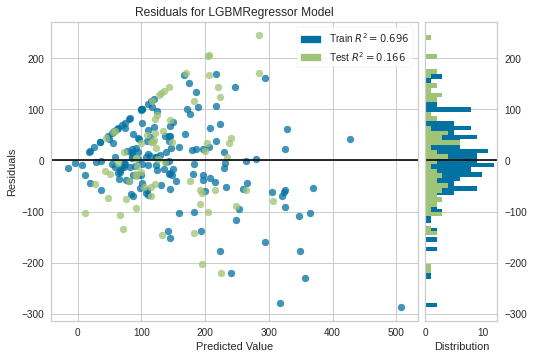

In [ ]:
plot_model(tuned_lightgbm)

### 10.2 Prediction Error Plot

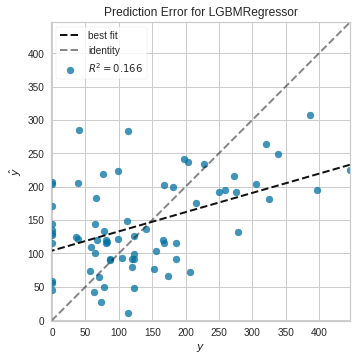

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

### 10.3 Feature Importance Plot

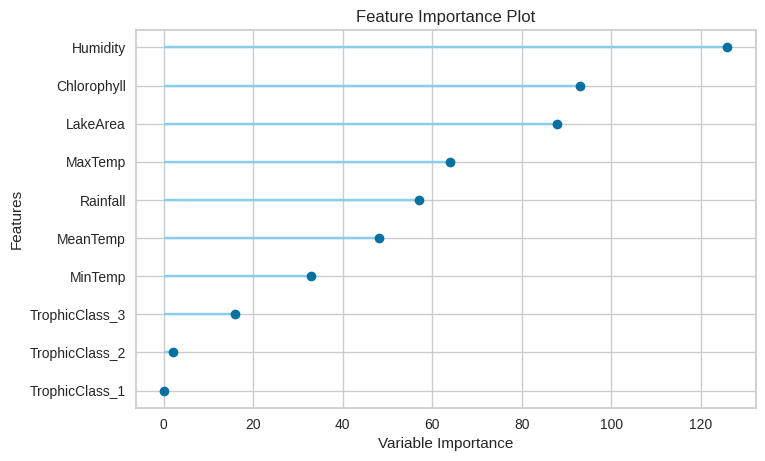

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (1621 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the `tuned_lightgbm` variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [ ]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,756.6163,3.595582e+06,1896.202,0.9672,0.0761,0.0541


The R2 on the test/hold-out set is **`0.9652`** compared to **`0.9708`** achieved on `tuned_lightgbm` CV results (in section 9.2 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model`.)

# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_lightgbm` under `predict_model()` to compare the information grid with the one above in section 11. 

In [ ]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,552.0006,1.342404e+06,1158.6215,0.9878,0.0611,0.0455


Notice how the R2 in the `final_lightgbm` has increased to **`0.9891`** from **`0.9652`**, even though the model is same. This is because the `final_lightgbm` variable is trained on the complete dataset including the test/hold-out set.

# 13.0 Predict on Unseen Data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (600 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12373.585508
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10272.344020
2,1.01,Good,E,SI1,G,G,GIA,5161,4967.753011
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34944.474773
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4166.156729


The `Label` column is added onto the `data_unseen` set. Label is the predicted value using the `final_lightgbm` model. If you want predictions to be rounded, you can use `round` parameter inside `predict_model()`. You can also check the metrics on this since you have actual target column `Price` available. To do that we will use pycaret.utils module. See example below:

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9756

# 14.0 Saving the Model

We have now finished the experiment by finalizing the `tuned_lightgbm` model which is now stored in `final_lightgbm` variable. We have also used the model stored in `final_lightgbm` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_value_...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
            

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the Saved Model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [ ]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9779

# 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.regression`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to __[Regression Tutorial (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__